# 04: Visualizations

## Objective: 
In this lesson, you will learn how to create and read simple visual charts that turn raw numbers into clear pictures. 

<table width="100%">
  <tr>
    <td style="vertical-align: top; text-align: left; width: 60%; padding-right: 20px;"> </br> </br></br> </br></br>
    <strong>You'll Build:</strong>
      <ol style="font-size: 18px; line-height: 1.4;">
        <li><strong>Histograms:</strong> to see how often different scores occur  </li>
        <li><strong>Box plots:</strong> to spot unusually high or low values and compare groups  </li>
        <li><strong>Scatter plots:</strong> to see if two measurements move together (for example, Age vs.  Recidivism Score) </li>
        <li><strong>Heatmaps:</strong> to quickly identify which pairs of variables tend to rise and fall in sync  </li>
      </ol>
    </td>
    <td style="vertical-align: top; text-align: left; width: 40%;">
   <!-- relative path to visualizations.png -->
      <img src="../slides/visualizations.png" alt="data vis" width="1000" />
    </td>
  </tr>
</table>

#### By the end, you’ll be able to describe in plain language what each chart shows—how your data are distributed, where patterns emerge, and which factors appear linked—even if you’ve never worked with data before.  
---
<audio controls src="../audio/Visualization.m4a">


---

### Creating Key Charts

In this lesson you’ll learn how to turn numbers into pictures. We’ll use four chart types—histograms, box plots, scatter plots, and heatmaps—to explore our recidivism dataset. Each section includes:

1. **What we’re doing** in plain English  
2. **Rcode** to run  
3. **What you’ll see** and **what it means**  

## 1. Histogram  
**What we’re doing:**  
The first visualization we will explore is the histogram. Here we’ll draw bars that show how many people fall into each score range. This helps you see if scores cluster around a central value or spread out evenly.


Warning message:
"package 'ggplot2' was built under R version 4.4.3"


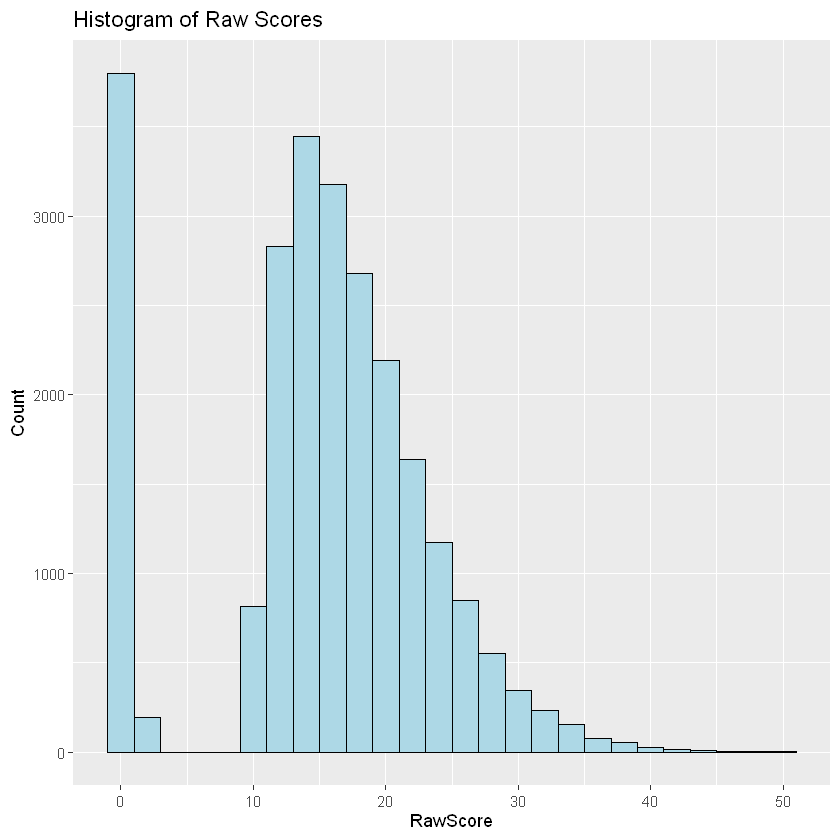

In [1]:
library(ggplot2)

#load the data
df <- read.csv("../data/compas_scores_raw.csv", stringsAsFactors = FALSE)

#generate the plot
ggplot(df, aes(x = RawScore)) +
  geom_histogram(binwidth = 2, color = "black", fill = "lightblue") +
  labs(
    title = "Histogram of Raw Scores",
    x     = "RawScore",
    y     = "Count"
  )

#### What You’ll See: Histogram of Raw Scores

We’ll walk through how to read the histogram you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the R code is doing and what the resulting chart tells you.

---

##### `library(ggplot2)`  
- Loads the **ggplot2** package, giving you access to its powerful, easy-to-use plotting functions.

##### `ggplot(df, aes(x = RawScore))`  
- Chooses your dataset (`df`)  
- Maps the `RawScore` values to the horizontal axis

##### `geom_histogram(binwidth = 2, color = "black", fill = "lightblue")`  
- **`binwidth = 2`** groups scores into ranges of 2 points each  
- **`color = "black"`** draws a black outline around each bar for clarity  
- **`fill = "lightblue"`** colors the bars so they’re easy to see

##### `labs(title = "Histogram of Raw Scores", x = "RawScore", y = "Count")`  
- Adds a **title** (“Histogram of Raw Scores”)  
- Labels the **x-axis** (“RawScore”) and **y-axis** (“Count”)

---


#### Interpreting the Chart
- **Vertical bars** represent how many individuals scored within each 2-point range.

- **Height of a bar** = number of records in that score bracket.

- The **tallest bar** is the “peak,” showing the most common score range.

- The **tails** (short bars stretching left or right) show rare, extreme scores.

- If one tail is much longer, your data are **skewed** (more extreme values on that side).

This visual helps you instantly see where most scores cluster and whether there are unusual low or high values you should investigate further.

---

## 2. Box Plot

**What we’re doing:**
 - Compute the 1st quartile (Q1, 25th percentile) and 3rd quartile (Q3, 75th percentile)
 - Draw a box from Q1 to Q3 to show the middle 50% of scores (the interquartile range, IQR)
 - Place a line inside the box at the median (50th percentile)
 - Extend “whiskers” from the box to the smallest and largest scores within 1.5 × IQR
 - Plot any scores beyond the whiskers as individual dots (outliers)

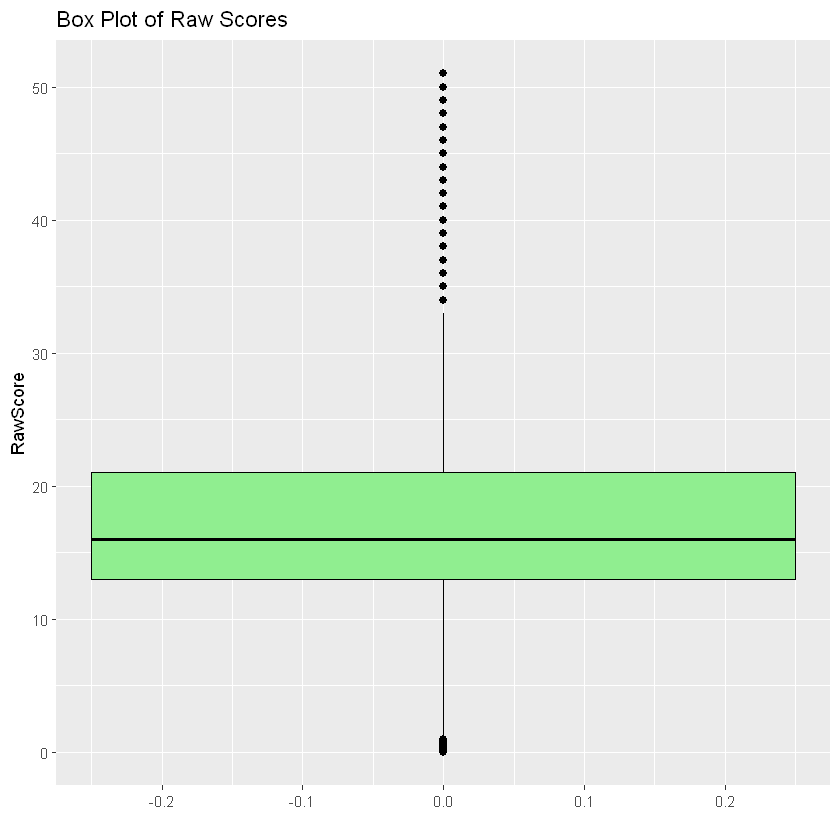

In [2]:
ggplot(df, aes(y = RawScore)) +
  geom_boxplot(
    width         = 0.5,         # Controls box width
    color         = "black",     # Outline color for clarity
    fill          = "lightgreen",# Box fill color
    outlier.shape = 16,          # Solid dot for outliers
    outlier.size  = 2            # Size of outlier dots
  ) +
  labs(
    title = "Box Plot of Raw Scores",  # Main title
    x     = "",                        # No x-axis label needed here
    y     = "RawScore"                 # Label for the score axis
  )

### What You’ll See: Box Plot of Raw Scores

We’ll walk through how to read the box plot you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the R code is doing and what the resulting chart tells you.

#### `ggplot(df, aes(y = RawScore))`
- Chooses your dataset (`df`)
- Maps the `RawScore` values to the vertical axis (one box for all scores)

#### `geom_boxplot(fill = "lightgreen")`
- Draws a **box** showing the middle 50% of scores (from the 25th to the 75th percentile)
- Puts a **line** inside the box at the median (the value splitting the data in half)
- Extends **whiskers** to the lowest and highest scores within 1.5× the interquartile range
- Marks any points beyond the whiskers as **outliers** (unusually low or high scores)
- Uses **`fill = "lightgreen"`** to color the box for clarity

#### labs(title = "Box Plot of Raw Scores", y = "RawScore")
- Adds a **title** so you know this is “Box Plot of Raw Scores”
- Labels the **`y-axis`** with `RawScore`
- (No x-axis label is needed since there’s only one group)



### Interpreting the plot
- The **height of the box** shows how spread out the middle half of your scores are.
- A **short box** means most scores are close together; a tall box means they vary more.
- The **line** inside the box tells you the median score.
- **Whiskers** reveal the typical low and high range of scores.
- **Outlier** dots flag any unusually extreme values you may want to investigate further.


---
## 3. Scatter Plot

**What we’re doing**  
We’ll draw one dot for each person in our dataset. The dot’s horizontal position shows their **Age**, and the vertical position shows their **RawScore**. This helps us see if older or younger people tend to score higher or lower.

**Using a sample**  
Plotting all 60,000+ data points would create a crowded chart and could actually obscure the trends we’re interested in. To keep the scatterplot clear and ensure any patterns stand out, we’ll use a random sample of 2000 observations from the original dataset.



In [3]:
# Scatter plot of Age vs RawScore
df2<- read.csv("../data/compas_sample_new.csv", stringsAsFactors = FALSE)

library(ggplot2)               # load ggplot2 for plotting
ggplot(df2, aes(x = Age, y = RawScore)) +
  geom_point(alpha = 0.3) +    # plot semi-transparent points so overlaps are visible
  labs(
    title = "Scatter: Age vs RawScore",  # chart title
    x     = "Age (years)",               # x-axis label
    y     = "RawScore"                   # y-axis label
  )

Warning message in file(file, "rt"):
"cannot open file '../data/compas_sample_new.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


### Scatter Plot of Age vs RawScore

We’ll walk through how to read the scatter plot you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the R code is doing and what the resulting chart tells you.

#### `df2 <- read.csv("../data/compas_sample_new.csv", stringsAsFactors = FALSE)`
- Reads your sample data (150 rows) into a data frame named **df2**.  
- `stringsAsFactors = FALSE` keeps any text columns as plain text, not factors.

#### `library(ggplot2)`
- Loads the **ggplot2** package, giving you access to its plotting functions.

#### `ggplot(df2, aes(x = Age, y = RawScore))`
- Chooses **df2** as your data source.  
- Maps `Age` to the horizontal axis and `RawScore` to the vertical axis.

#### `geom_point(alpha = 0.3)`
- Draws one dot for each person in the sample.  
- `alpha = 0.3` makes points semi-transparent so overlapping dots remain visible.

#### `labs(title = "Scatter: Age vs RawScore", x = "Age (years)", y = "RawScore")`
- Adds a **title** to the chart.  
- Labels the x-axis with “Age (years)” and the y-axis with “RawScore”.

---

### What you’ll see
- A **cloud of dots**, each representing one person’s age and risk score.  
- If the cloud **slopes upward**, it suggests older individuals tend to have higher RawScores.  
- If the cloud is **flat**, there’s no clear relationship between age and score.  
- **Clusters** of dots show age groups with similar score patterns.  
- **Gaps** may reveal age ranges that are under-represented in your sample.  



---

## Correlation Analysis

The last topic we will cover is correlation analysis.
    
**What It Is**  
- A way to see how two numeric variables move together.  
- Scores range from **–1** (exactly opposite), through **0** (no relationship), to **+1** (move in perfect sync).

**Why It Matters**  
- **Find linked factors:** know which measures rise and fall together (for example, higher RawScore often goes with higher DecileScore).  
- **Avoid redundant inputs:** if two variables behave almost identically, you only need one in your model.  
- **Pick the right features:** focus on variables that add unique value, rather than clutter.

**Common Tools** 
- **Correlation Matrix:** a simple table listing the correlation score for every pair of variables.   
- **Heatmap:** the same table shown in color, so you can spot strong relationships at a glance.   
- **Scatterplot Matrix:** small scatter plots for each variable pair, letting you see the actual data points and check for non-linear patterns or outliers.  


---

## Correlation Matrix

We’ll first create a **correlation matrix**, which is a table showing how strongly each numeric variable in our COMPAS data moves with every other. Values range from **–1** (perfect opposite) to **+1** (perfect sync), with **0** meaning no linear relationship.


In [ ]:
# 1. Load your data
df <- read.csv("../data/compas_scores_raw.csv", stringsAsFactors = FALSE)

# 2. Keep only numeric columns
num_df <- df[sapply(df, is.numeric)]

# 3. Compute the correlation matrix (ignoring missing values)
corr_mat <- cor(num_df, use = "pairwise.complete.obs")

# 4. Print the matrix, rounded to two decimals
print(round(corr_mat, 2))

### What you’ll see
- A **square table** where each row and column is one numeric field (Age, RawScore, DecileScore, etc.).
- Each cell shows the correlation coefficient between that row’s variable and that column’s variable.
- Look for values near **+1** (strong positive link) or **–1** (strong negative link). Values near 0 mean little linear relationship.

---

##  Heatmap 

**What we’re doing**  
We want to see how our key numeric variables (like Age, RawScore, DecileScore) move together. A correlation heatmap is a colored grid where each cell shows the strength of the relationship between two variables.


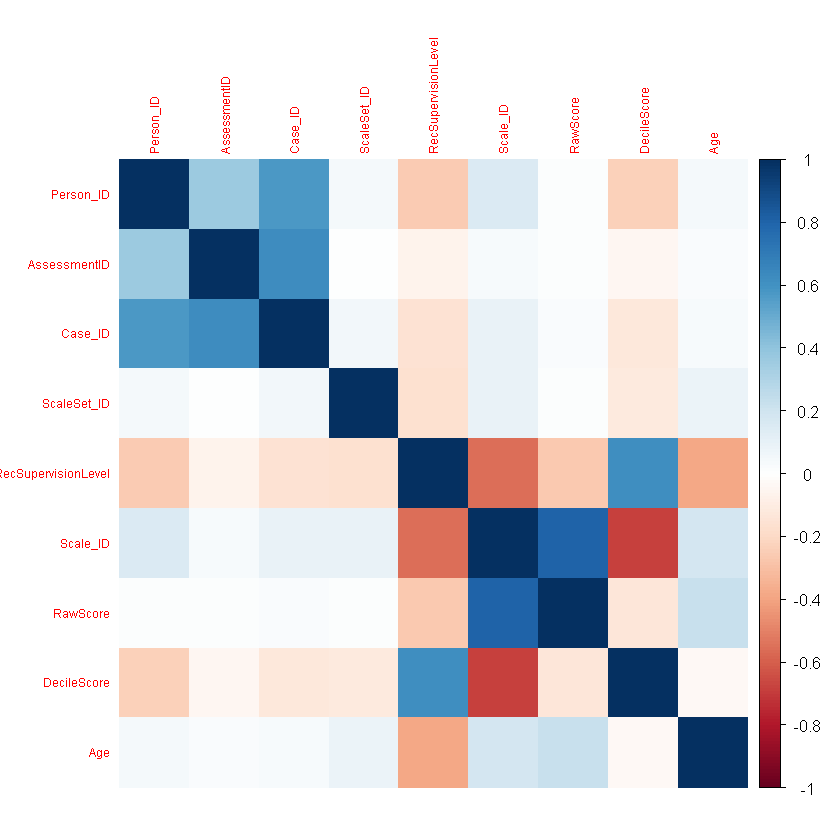

In [14]:
# provides easy correlation plotting
library(corrplot)
df<- read.csv("../data/compas_scores_positive.csv", stringsAsFactors = FALSE)
# 2. Select only the columns with numbers
num_df <- df[sapply(df, is.numeric)]  

# 3. Compute the correlation matrix
#    Each value ranges from -1 to +1:
#      +1 means two variables rise and fall together perfectly,
#      -1 means they move in opposite directions perfectly,
#       0 means no linear relationship.
corr_mat <- cor(num_df, use = "pairwise.complete.obs")

# 4. Draw the heatmap
#    - method = "color" fills cells with a color scale,
#    - tl.cex = 0.6 shrinks the variable names so they fit.
corrplot(corr_mat, method = "color", tl.cex = 0.6)

### Correlation Heatmap

We’ll walk through how to read the heatmap you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the R code is doing and what the resulting chart tells you.

#### `library(corrplot)`
- Brings in **corrplot**, a package that makes drawing correlation grids easy.

#### `num_df <- df[sapply(df, is.numeric)]`
- Selects **only the numeric columns** (like Age, RawScore, DecileScore) from your data.

#### `corr_mat <- cor(num_df, use = "pairwise.complete.obs")`
- Calculates the **correlation** for each pair of numeric variables, ignoring any missing values.
- Each correlation value ranges from **–1** (perfect negative relationship) to **+1** (perfect positive relationship), with **0** meaning no linear relationship.

#### `corrplot(corr_mat, method = "color", tl.cex = 0.6)`
- Converts those numbers into a **colored grid**:
  - **Dark red** cells (values near +1) mean two variables rise and fall together strongly.
  - **Dark blue** cells (values near –1) mean one variable increases as the other decreases.
  - **Light or white** cells (values near 0) mean little or no linear link.
- `method = "color"` fills each cell with a splash of color proportional to the correlation.
- `tl.cex = 0.6` makes the variable labels small enough to fit around the grid.

---

### What you’ll see
- A **square grid** with your variable names along the top and left edges.
- **Color intensity** shows how strongly each pair of variables moves together.
  - **Bright red** = strong positive correlation  
  - **Bright blue** = strong negative correlation  
  - **Pale or white** = little to no correlation
- Use this chart to:
  - Spot unexpected links (e.g., if Age and RawScore tend to rise together)  
  - Check for **multicollinearity** (if two predictors are almost identical, you may need to drop one before further analysis)  


---

##  Scatterplot Matrix

**What we’re doing**  
Next, we’ll draw a scatterplot matrix—a grid of scatter plots showing each pair of numeric variables. This helps you see the actual data points and spot non-linear patterns or outliers.

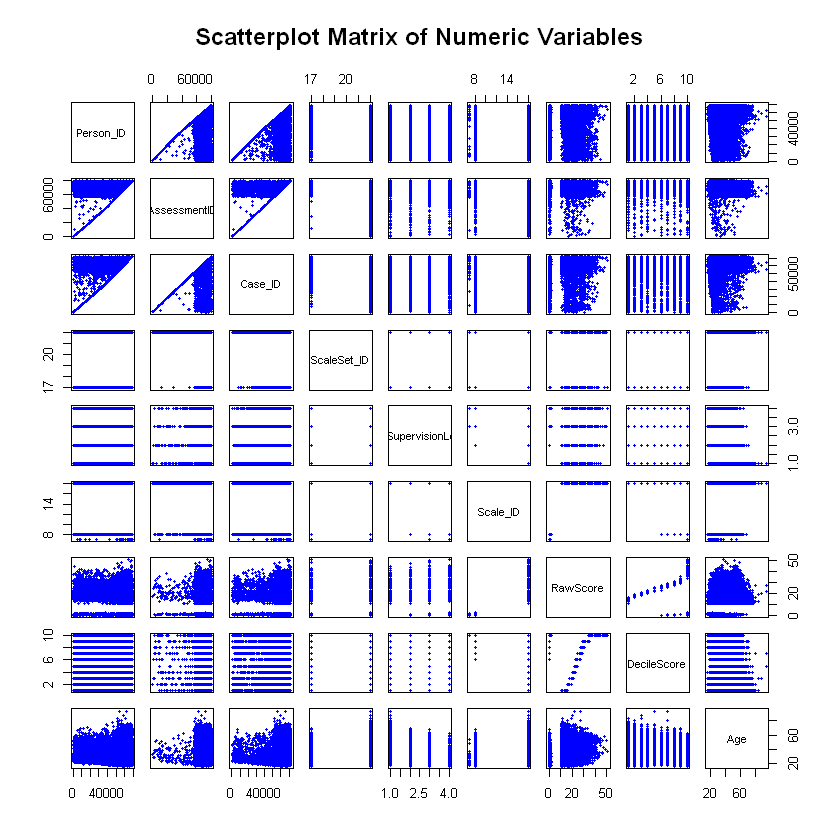

In [2]:
# 1. (If not already) load your data and numeric subset
df <- read.csv("../data/compas_scores_raw.csv", stringsAsFactors = FALSE)
num_df <- df[sapply(df, is.numeric)]

# 2. Draw the scatterplot matrix
pairs(
  num_df,
  main   = "Scatterplot Matrix of Numeric Variables",
  pch    = 19,       # solid circle for each point
  cex    = 0.5,      # make points smaller
  col    = "blue"    # color of the points
)

### What you’ll see

- A **grid of small scatter plots**  
  Each cell at row *i*, column *j* plots Variable *i* on the y-axis versus Variable *j* on the x-axis.

- **Diagonal histograms**  
  The diagonal cells show a histogram of each variable’s distribution.

- **Dense clouds**  
  Thick clusters of points mean many similar value pairs.

- **Gaps or tails**  
  Open spaces or extended tails highlight outliers or skew.

- **How to use it**  
  - Look for **straight-line patterns** to identify linked variables.  
  - Notice **random scatter** for variables with no clear relationship.  
  - Spot **isolated points** far from the main cloud to find extreme values.  


---

# 🎉 You’re All Set!

You’ve completed the **Data Visualization** module. You now know how to:

- Create histograms, box plots, scatter plots, and heatmaps  
- Interpret each chart to uncover patterns, outliers, and relationships  
- Use visual tools to guide your next analysis steps  

---

## Next Step: Final Thoughts

Head over to **`06_final_thoughts.ipynb`** to wrap up your **Exploratory Data Analysis** lesson. There, we’ll review key takeaways and discuss best practices for documenting and sharing your insights.  
